In [1]:
# Scenario 3: Director or Cast

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import re
import matplotlib.pyplot as plt
import operator

In [5]:
import numpy as np

In [6]:
pd.set_option('display.max_columns', 100)

In [8]:
ratings =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\ratings.csv")

In [7]:
ratings_sm =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\ratings_small.csv")

In [11]:
mlrc =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\movies_link_rating_crew.csv", index_col=0)

In [15]:
ratings_sm.head(1)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144


In [12]:
mlrc.head(1)

,id_x,imdb_id,original_title,title,genres,original_language,prod1,country,budget,runtime,imdbid,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,movieId,imdbId,tmdbId,userId,rating,timestamp,movie_id,lead_actor,lead_actress,id_y,director1
0,862,tt0114709,Toy Story,Toy Story,"Animation, Comedy, Family",en,Pixar Animation Studios,US,30000000,81.0,114709,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,114709.0,862.0,135121.043616,3.888157,1.113440e+09,862.0,Tom Hanks,Annie Potts,862.0,John Lasseter


In [78]:
mlrc22 = mlrc[['movieId', 'Action', 'Adventure', 'Animation',	'Comedy',	'Crime',	'Documentary',	'Drama',	'Family',	'Fantasy',	'Foreign',	'History',	'Horror',	'Music',	
                                  'Mystery',	'Romance',	'Science Fiction',	'TV Movie',	'Thriller',	'War',	'Western', 'original_language', 'prod1', 'country', 'budget', 'runtime', 
                                  'lead_actor', 'lead_actress', 'director1', 'rating']]
mlrc22.head(1)

,movieId,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,lead_actor,lead_actress,director1,rating
0,1.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,Tom Hanks,Annie Potts,John Lasseter,3.888157


# done for classificatoin

###############################

In [16]:
mlrc22.shape

(44665, 29)

In [17]:
ratings_sm.shape

(100004, 4)

In [51]:
mlrc3 = mlrc22.merge(ratings_sm[['movieId', 'rating']], how = 'inner', on='movieId')
mlrc3.shape

(99777, 30)

In [52]:
mlrc3.head(1)

,movieId,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,lead_actor,lead_actress,director1,rating
0,1.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,Tom Hanks,Annie Potts,John Lasseter,3.0


In [53]:
mlrc3['rating'].value_counts(dropna=False)

4.0    28697
3.0    20037
5.0    15037
3.5    10508
4.5     7695
2.0     7259
2.5     4443
1.0     3321
1.5     1684
0.5     1096
Name: rating, dtype: int64

In [54]:
mlrc3['rating'] = mlrc3['rating'].astype(str)
mlrc3['rating'] = mlrc3['rating'].map({'0.5': 0, '1.0':1, '1.5':2, '2.0':3, '2.5':4, '3.0':5, '3.5':6, '4.0':7, '4.5':8, '5.0':9})
mlrc3['rating'].value_counts(dropna=False)

7    28697
5    20037
9    15037
6    10508
8     7695
3     7259
4     4443
1     3321
2     1684
0     1096
Name: rating, dtype: int64

In [63]:
mlrc3.head(5)

,movieId,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,lead_actor,lead_actress,director1,rating
0,1.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,Tom Hanks,Annie Potts,John Lasseter,5
1,1.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,Tom Hanks,Annie Potts,John Lasseter,7
2,1.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,Tom Hanks,Annie Potts,John Lasseter,9
3,1.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,Tom Hanks,Annie Potts,John Lasseter,3
4,1.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,Tom Hanks,Annie Potts,John Lasseter,5


In [48]:
pd.isnull(mlrc3).sum()

movieId                 0
Action                  0
Adventure               0
Animation               0
Comedy                  0
Crime                   0
Documentary             0
Drama                   0
Family                  0
Fantasy                 0
Foreign                 0
History                 0
Horror                  0
Music                   0
Mystery                 0
Romance                 0
Science Fiction         0
TV Movie                0
Thriller                0
War                     0
Western                 0
original_language       0
prod1                1637
country               519
budget                  0
runtime                 0
lead_actor            696
lead_actress         4350
director1             619
rating                  0
dtype: int64

###########################################################

# Attempt 5?? Create dummy var for actors and directors

###########################################################

In [ ]:
# Use mlrc data to merge with lead_cast data
# on mlrc(movie_id), lead_cast(movie_id)

In [ ]:
# Remove actor, actress data from mlrc
# Remove dups
# Merge with lead_cast

In [82]:
mlrc.head(1)

,id_x,imdb_id,original_title,title,genres,original_language,prod1,country,budget,runtime,imdbid,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,movieId,imdbId,tmdbId,userId,rating,timestamp,movie_id,lead_actor,lead_actress,id_y,director1
0,862,tt0114709,Toy Story,Toy Story,"Animation, Comedy, Family",en,Pixar Animation Studios,US,30000000,81.0,114709,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,114709.0,862.0,135121.043616,3.888157,1.113440e+09,862.0,Tom Hanks,Annie Potts,862.0,John Lasseter


In [89]:
mlrc.shape

(44665, 42)

In [83]:
cast =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\lead_cast.csv", index_col=0)
cast.head(1)

,movie_id,name
0,2,Matti Pellonpää


In [85]:
mlrc_2 = mlrc[['movie_id', 'Action', 'Adventure', 'Animation',	'Comedy',	'Crime',	'Documentary',	'Drama',	'Family',	'Fantasy',	'Foreign',	'History',	'Horror',	'Music',	
                                  'Mystery',	'Romance',	'Science Fiction',	'TV Movie',	'Thriller',	'War',	'Western', 'original_language', 'prod1', 'country', 'budget', 'runtime', 
                                  'director1', 'rating']]
mlrc_2.head(1)

,movie_id,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,director1,rating
0,862.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,John Lasseter,3.888157


In [ ]:
# Remove dups

In [86]:
# Remove duplicates
cond = mlrc_2['movie_id'].duplicated(keep=False)
mlrc_2.loc[cond, ['movie_id']].sort_values('movie_id').head(10)

,movie_id
25647,3057.0
25648,3057.0
5862,4912.0
5861,4912.0
7338,5511.0
7337,5511.0
25665,8767.0
25666,8767.0
25661,9755.0
25662,9755.0


In [87]:
print('Number of duplicate imdb_ids before drop: {}'.format(mlrc_2['movie_id'].duplicated().sum()))
mlrc_2.drop_duplicates('movie_id', inplace=True)
print('Number of duplicate imdb_ids remaining: {}'.format(mlrc_2['movie_id'].duplicated().sum()))

Number of duplicate imdb_ids before drop: 5026
Number of duplicate imdb_ids remaining: 0


C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
mlrc_2.shape

(39639, 28)

In [ ]:
# Merge mlrc_2 and cast data by movie_id

In [92]:
mlrc_3 = mlrc_2.merge(cast, how='inner', on='movie_id')
mlrc_3.shape

(38213, 29)

In [93]:
mlrc_3.head(5)

,movie_id,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,director1,rating,name
0,862.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,John Lasseter,3.888157,Tom Hanks
1,8844.0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,en,TriStar Pictures,US,65000000,104.0,Joe Johnston,3.236953,Robin Williams
2,15602.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,en,Warner Bros.,US,0,101.0,Howard Deutch,3.175550,Walter Matthau
3,31357.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,en,Twentieth Century Fox Film Corporation,US,16000000,127.0,Forest Whitaker,2.875713,Gregory Hines
4,11862.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,en,Sandollar Productions,US,0,106.0,Charles Shyer,3.079565,Steve Martin


# Check NaN

In [94]:
pd.isnull(mlrc_3).sum()

movie_id                0
Action                  0
Adventure               0
Animation               0
Comedy                  0
Crime                   0
Documentary             0
Drama                   0
Family                  0
Fantasy                 0
Foreign                 0
History                 0
Horror                  0
Music                   0
Mystery                 0
Romance                 0
Science Fiction         0
TV Movie                0
Thriller                0
War                     0
Western                 0
original_language       5
prod1                8146
country              3959
budget                  0
runtime               171
director1             483
rating                  0
name                    0
dtype: int64

In [95]:
# For the ease of keeping the codes the same
mlrc3 = mlrc_3

In [97]:
mlrc3.dropna(subset=['director1'], axis='rows', inplace=True)
mlrc3.dropna(subset=['runtime'], axis='rows', inplace=True)
mlrc3.dropna(subset=['original_language'], axis='rows', inplace=True)
mlrc3.dropna(subset=['prod1'], axis='rows', inplace=True)
mlrc3.dropna(subset=['country'], axis='rows', inplace=True)
pd.isnull(mlrc3).sum()

movie_id             0
Action               0
Adventure            0
Animation            0
Comedy               0
Crime                0
Documentary          0
Drama                0
Family               0
Fantasy              0
Foreign              0
History              0
Horror               0
Music                0
Mystery              0
Romance              0
Science Fiction      0
TV Movie             0
Thriller             0
War                  0
Western              0
original_language    0
prod1                0
country              0
budget               0
runtime              0
director1            0
rating               0
name                 0
dtype: int64

In [98]:
mlrc3.shape

(29398, 29)

In [99]:
mlrc3.head(1)

,movie_id,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,director1,rating,name
0,862.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,en,Pixar Animation Studios,US,30000000,81.0,John Lasseter,3.888157,Tom Hanks


In [100]:
# Remove production company, original language
mlrc4 = mlrc3[['movie_id', 'Action', 'Adventure', 'Animation',	'Comedy',	'Crime',	'Documentary',	'Drama',	'Family',	'Fantasy',	'Foreign',	'History',	'Horror',	'Music',	
                                  'Mystery',	'Romance',	'Science Fiction',	'TV Movie',	'Thriller',	'War',	'Western', 'country', 'budget', 'runtime', 
                                  'director1', 'rating', 'name']]
mlrc4.head(1)

,movie_id,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,country,budget,runtime,director1,rating,name
0,862.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,US,30000000,81.0,John Lasseter,3.888157,Tom Hanks


In [109]:
pd.isnull(mlrc4).sum()

movie_id           0
Action             0
Adventure          0
Animation          0
Comedy             0
Crime              0
Documentary        0
Drama              0
Family             0
Fantasy            0
Foreign            0
History            0
Horror             0
Music              0
Mystery            0
Romance            0
Science Fiction    0
TV Movie           0
Thriller           0
War                0
Western            0
country            0
budget             0
runtime            0
director1          0
rating             0
name               0
dtype: int64

##############################################

# Separate each var into dummy variable
# name: lead cast
# director1: director
# country

###############################################

In [106]:
cast_dummy = pd.get_dummies(mlrc4.name, prefix='cast')
mlrc5 = mlrc4.join(cast_dummy)
mlrc5.head(1)

,movie_id,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,country,budget,runtime,director1,rating,name,cast_50 Cent,cast_A Martinez,cast_A Sai,cast_A.J. Buckley,cast_A.K. Hangal,cast_AJ Bowen,cast_Aadhi,cast_Aage Haugland,cast_Aake Kalliala,cast_Aamir Khan,cast_Aaron Abrams,cast_Aaron Ashmore,cast_Aaron Carter,cast_Aaron Douglas,cast_Aaron Eckhart,cast_Aaron Groben,cast_Aaron Hendry,cast_Aaron Hill,cast_Aaron Kwok,cast_Aaron Michael Metchik,cast_Aaron Paul,cast_Aaron Pedersen,cast_Aaron Perilo,...,cast_Zbigniew Cybulski,cast_Zbigniew Zamachowski,cast_Zbigniew Zapasiewicz,cast_Zdeněk Svěrák,cast_Zdeněk Štěpánek,cast_Zeljko Ivanek,cast_Zero Mostel,cast_Zhang Hanyu,cast_Zhang Zhi-Zhi,cast_Ziauddin Yousafzai,cast_Ziggy Marley,cast_Zinedine Soualem,cast_Zlatko Burić,cast_Zohar Strauss,cast_Zoltán Latinovits,cast_Zsolt László,cast_Zygmunt Malanowicz,cast_Àlex Brendemühl,cast_Ákos Horváth,cast_Álex García,cast_Álex González,cast_Álvaro Cervantes,cast_Ángel Aranda,cast_Ángel de Andrés López,cast_Åke Fridell,cast_Åke Lindman,cast_Édouard Tremblay-Grenier,cast_Émile Berling,cast_Éric Bruneau,cast_Éric Caravaca,cast_Ólafur Darri Ólafsson,cast_Óscar Jaenada,cast_Örjan Ramberg,cast_Þorsteinn Bachmann,cast_Þröstur Leó Gunnarsson,cast_İlyas Salman,cast_Łukasz Simlat,cast_Őze Lajos,cast_Šarūnas Bartas,cast_Ștefan Mihăilescu-Brăila,cast_Александр Гордон,cast_Александр Спорыхин,cast_Анатолій Солоніцин,cast_Дэмиан Чапа,cast_Михаил Пореченков,cast_Моррис Честнат,cast_پیمان معادی,cast_杰森·莫玛,cast_松田龙平,cast_高桥一生
0,862.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,US,30000000,81.0,John Lasseter,3.888157,Tom Hanks,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
dir_dummy = pd.get_dummies(mlrc4.director1, prefix='dir')
mlrc6 = mlrc5.join(dir_dummy)
mlrc6.head(1)

,movie_id,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,country,budget,runtime,director1,rating,name,cast_50 Cent,cast_A Martinez,cast_A Sai,cast_A.J. Buckley,cast_A.K. Hangal,cast_AJ Bowen,cast_Aadhi,cast_Aage Haugland,cast_Aake Kalliala,cast_Aamir Khan,cast_Aaron Abrams,cast_Aaron Ashmore,cast_Aaron Carter,cast_Aaron Douglas,cast_Aaron Eckhart,cast_Aaron Groben,cast_Aaron Hendry,cast_Aaron Hill,cast_Aaron Kwok,cast_Aaron Michael Metchik,cast_Aaron Paul,cast_Aaron Pedersen,cast_Aaron Perilo,...,dir_Zoe Clarke-Williams,dir_Zoe Lister-Jones,dir_Zoe R. Cassavetes,dir_Zoltan Korda,dir_Zoltán Fábri,dir_Zoltán Huszárik,dir_Zoran Lisinac,dir_Zoran Tadić,dir_Zoya Akhtar,dir_Zrinko Ogresta,dir_Zsolt Bács,dir_Àlex Pastor,dir_Ádám Császi,dir_Ágnes Kocsis,dir_Ágúst Guðmundsson,dir_Álex Pina,dir_Álex de la Iglesia,dir_Álvaro Brechner,dir_Álvaro Fernández Armero,dir_Álvaro Sáenz de Heredia,dir_Álvaro de Armiñán,dir_Ángel Muñiz,dir_Áron Gauder,dir_Åke Lindman,dir_Åke Sandgren,dir_Åsleik Engmark,dir_Çağan Irmak,dir_Çetin Inanç,dir_Édouard Molinaro,dir_Émile Cohl,dir_Émile Gaudreault,dir_Éric Besnard,dir_Éric Hannezo,dir_Éric Rohmer,dir_Éric Tessier,dir_Étienne Chatiliez,dir_Éva Gárdos,dir_Óscar Aibar,dir_Ömer Faruk Sorak,dir_Özer Kiziltan,dir_Özgür Yildirim,dir_Łukasz Palkowski,dir_Šarūnas Bartas,dir_Žiga Virc,dir_Александр Зельдович,dir_Геннадий Сокольский,dir_Михаил Пореченков,dir_Ярополк Лапшин,dir_塩谷 直義,dir_杰森·莫玛
0,862.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,US,30000000,81.0,John Lasseter,3.888157,Tom Hanks,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
country_dummy = pd.get_dummies(mlrc4.country, prefix='cont')
mlrc7 = mlrc6.join(country_dummy)

In [110]:
mlrc6.shape

(29398, 20705)

In [113]:
mlrc7.shape

(29398, 20825)

In [114]:
mlrc7.head(1)

,movie_id,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,country,budget,runtime,director1,rating,name,cast_50 Cent,cast_A Martinez,cast_A Sai,cast_A.J. Buckley,cast_A.K. Hangal,cast_AJ Bowen,cast_Aadhi,cast_Aage Haugland,cast_Aake Kalliala,cast_Aamir Khan,cast_Aaron Abrams,cast_Aaron Ashmore,cast_Aaron Carter,cast_Aaron Douglas,cast_Aaron Eckhart,cast_Aaron Groben,cast_Aaron Hendry,cast_Aaron Hill,cast_Aaron Kwok,cast_Aaron Michael Metchik,cast_Aaron Paul,cast_Aaron Pedersen,cast_Aaron Perilo,...,cont_MC,cont_ME,cont_MK,cont_ML,cont_MQ,cont_MR,cont_MT,cont_MX,cont_MY,cont_NG,cont_NL,cont_NO,cont_NZ,cont_PA,cont_PE,cont_PH,cont_PK,cont_PL,cont_PR,cont_PS,cont_PT,cont_QA,cont_RO,cont_RS,cont_RU,cont_RW,cont_SE,cont_SG,cont_SI,cont_SK,cont_SN,cont_SU,cont_TH,cont_TJ,cont_TN,cont_TR,cont_TT,cont_TW,cont_TZ,cont_UA,cont_UM,cont_US,cont_UY,cont_UZ,cont_VE,cont_VN,cont_XC,cont_XG,cont_YU,cont_ZA
0,862.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,US,30000000,81.0,John Lasseter,3.888157,Tom Hanks,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [115]:
# Drop vars that are not needed
mlrc8 = mlrc7.drop(mlrc6.columns[[0, 21, 24, 26]], axis=1)
mlrc8.head(1)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,budget,runtime,rating,cast_50 Cent,cast_A Martinez,cast_A Sai,cast_A.J. Buckley,cast_A.K. Hangal,cast_AJ Bowen,cast_Aadhi,cast_Aage Haugland,cast_Aake Kalliala,cast_Aamir Khan,cast_Aaron Abrams,cast_Aaron Ashmore,cast_Aaron Carter,cast_Aaron Douglas,cast_Aaron Eckhart,cast_Aaron Groben,cast_Aaron Hendry,cast_Aaron Hill,cast_Aaron Kwok,cast_Aaron Michael Metchik,cast_Aaron Paul,cast_Aaron Pedersen,cast_Aaron Perilo,cast_Aaron Stanford,cast_Aaron Swartz,cast_Aaron Taylor-Johnson,cast_Aaron Tveit,...,cont_MC,cont_ME,cont_MK,cont_ML,cont_MQ,cont_MR,cont_MT,cont_MX,cont_MY,cont_NG,cont_NL,cont_NO,cont_NZ,cont_PA,cont_PE,cont_PH,cont_PK,cont_PL,cont_PR,cont_PS,cont_PT,cont_QA,cont_RO,cont_RS,cont_RU,cont_RW,cont_SE,cont_SG,cont_SI,cont_SK,cont_SN,cont_SU,cont_TH,cont_TJ,cont_TN,cont_TR,cont_TT,cont_TW,cont_TZ,cont_UA,cont_UM,cont_US,cont_UY,cont_UZ,cont_VE,cont_VN,cont_XC,cont_XG,cont_YU,cont_ZA
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30000000,81.0,3.888157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [116]:
mlrc8.to_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\mlrc8_contdircastyesno.csv")

In [117]:
from math import exp, log

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.special import expit

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

%matplotlib inline 

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.figsize'] = 10, 8

np.seterr(divide='ignore', invalid='ignore')
np.random.seed(42)

In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [120]:
# Take portion of data
mlrc8_sm = mlrc8.sample(frac=0.1)
mlrc8_sm.shape

(2940, 20821)

In [134]:
# divide data into labels and attributes
X = mlrc8.drop('rating', axis=1)
y = mlrc8['rating']

In [122]:
X.head(1)

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,budget,runtime,cast_50 Cent,cast_A Martinez,cast_A Sai,cast_A.J. Buckley,cast_A.K. Hangal,cast_AJ Bowen,cast_Aadhi,cast_Aage Haugland,cast_Aake Kalliala,cast_Aamir Khan,cast_Aaron Abrams,cast_Aaron Ashmore,cast_Aaron Carter,cast_Aaron Douglas,cast_Aaron Eckhart,cast_Aaron Groben,cast_Aaron Hendry,cast_Aaron Hill,cast_Aaron Kwok,cast_Aaron Michael Metchik,cast_Aaron Paul,cast_Aaron Pedersen,cast_Aaron Perilo,cast_Aaron Stanford,cast_Aaron Swartz,cast_Aaron Taylor-Johnson,cast_Aaron Tveit,cast_Aaron Yoo,...,cont_MC,cont_ME,cont_MK,cont_ML,cont_MQ,cont_MR,cont_MT,cont_MX,cont_MY,cont_NG,cont_NL,cont_NO,cont_NZ,cont_PA,cont_PE,cont_PH,cont_PK,cont_PL,cont_PR,cont_PS,cont_PT,cont_QA,cont_RO,cont_RS,cont_RU,cont_RW,cont_SE,cont_SG,cont_SI,cont_SK,cont_SN,cont_SU,cont_TH,cont_TJ,cont_TN,cont_TR,cont_TT,cont_TW,cont_TZ,cont_UA,cont_UM,cont_US,cont_UY,cont_UZ,cont_VE,cont_VN,cont_XC,cont_XG,cont_YU,cont_ZA
34938,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4000000,90.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
names =list(X.columns)

# CART

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [136]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_leaf_nodes =20, max_depth =8)
rt = regressor.fit(X_train, y_train)
rt

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=20, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [137]:
y_pred = regressor.predict(X_test)

In [138]:
compare =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
compare

,Actual,Predicted
18855,3.322917,3.393879
13901,3.250000,3.243109
3875,2.788462,3.252966
4175,3.273810,3.252966
34722,4.500000,2.887649
...,...,...
36087,3.875000,3.211726
2074,3.573658,3.243109
18554,3.576923,3.393879
31499,3.750000,3.393879


In [139]:
# Evaluating the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4595187853815675
Mean Squared Error: 0.38090095016149217
Root Mean Squared Error: 0.6171717347396041


In [129]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
importance = rt.feature_importances_

In [130]:
importance

array([0., 0., 0., ..., 0., 0., 0.])

In [140]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.06639
Feature: 6, Score: 0.06888
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.17336
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.02002
Feature: 21, Score: 0.27551
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

NameError: name 'pyplot' is not defined

In [419]:
conda install -c conda-forge pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\spark2\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.0                |   py37hf50a25e_1         3.1 MB  conda-forge
    graphviz-2.38.0            |    h6538335_1011        41.0 MB  conda-forge
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        44.0 MB

The following NEW packages will be INSTALLED:

  graphviz           conda-forge/win-64::graphviz-2.38.0-h6538335_1011
  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_2

The following packages will be UPDATED:

  conda                                4.8.5-py37hc8dfbb8_1 --> 4.9.0-py37hf50a25e_1




g

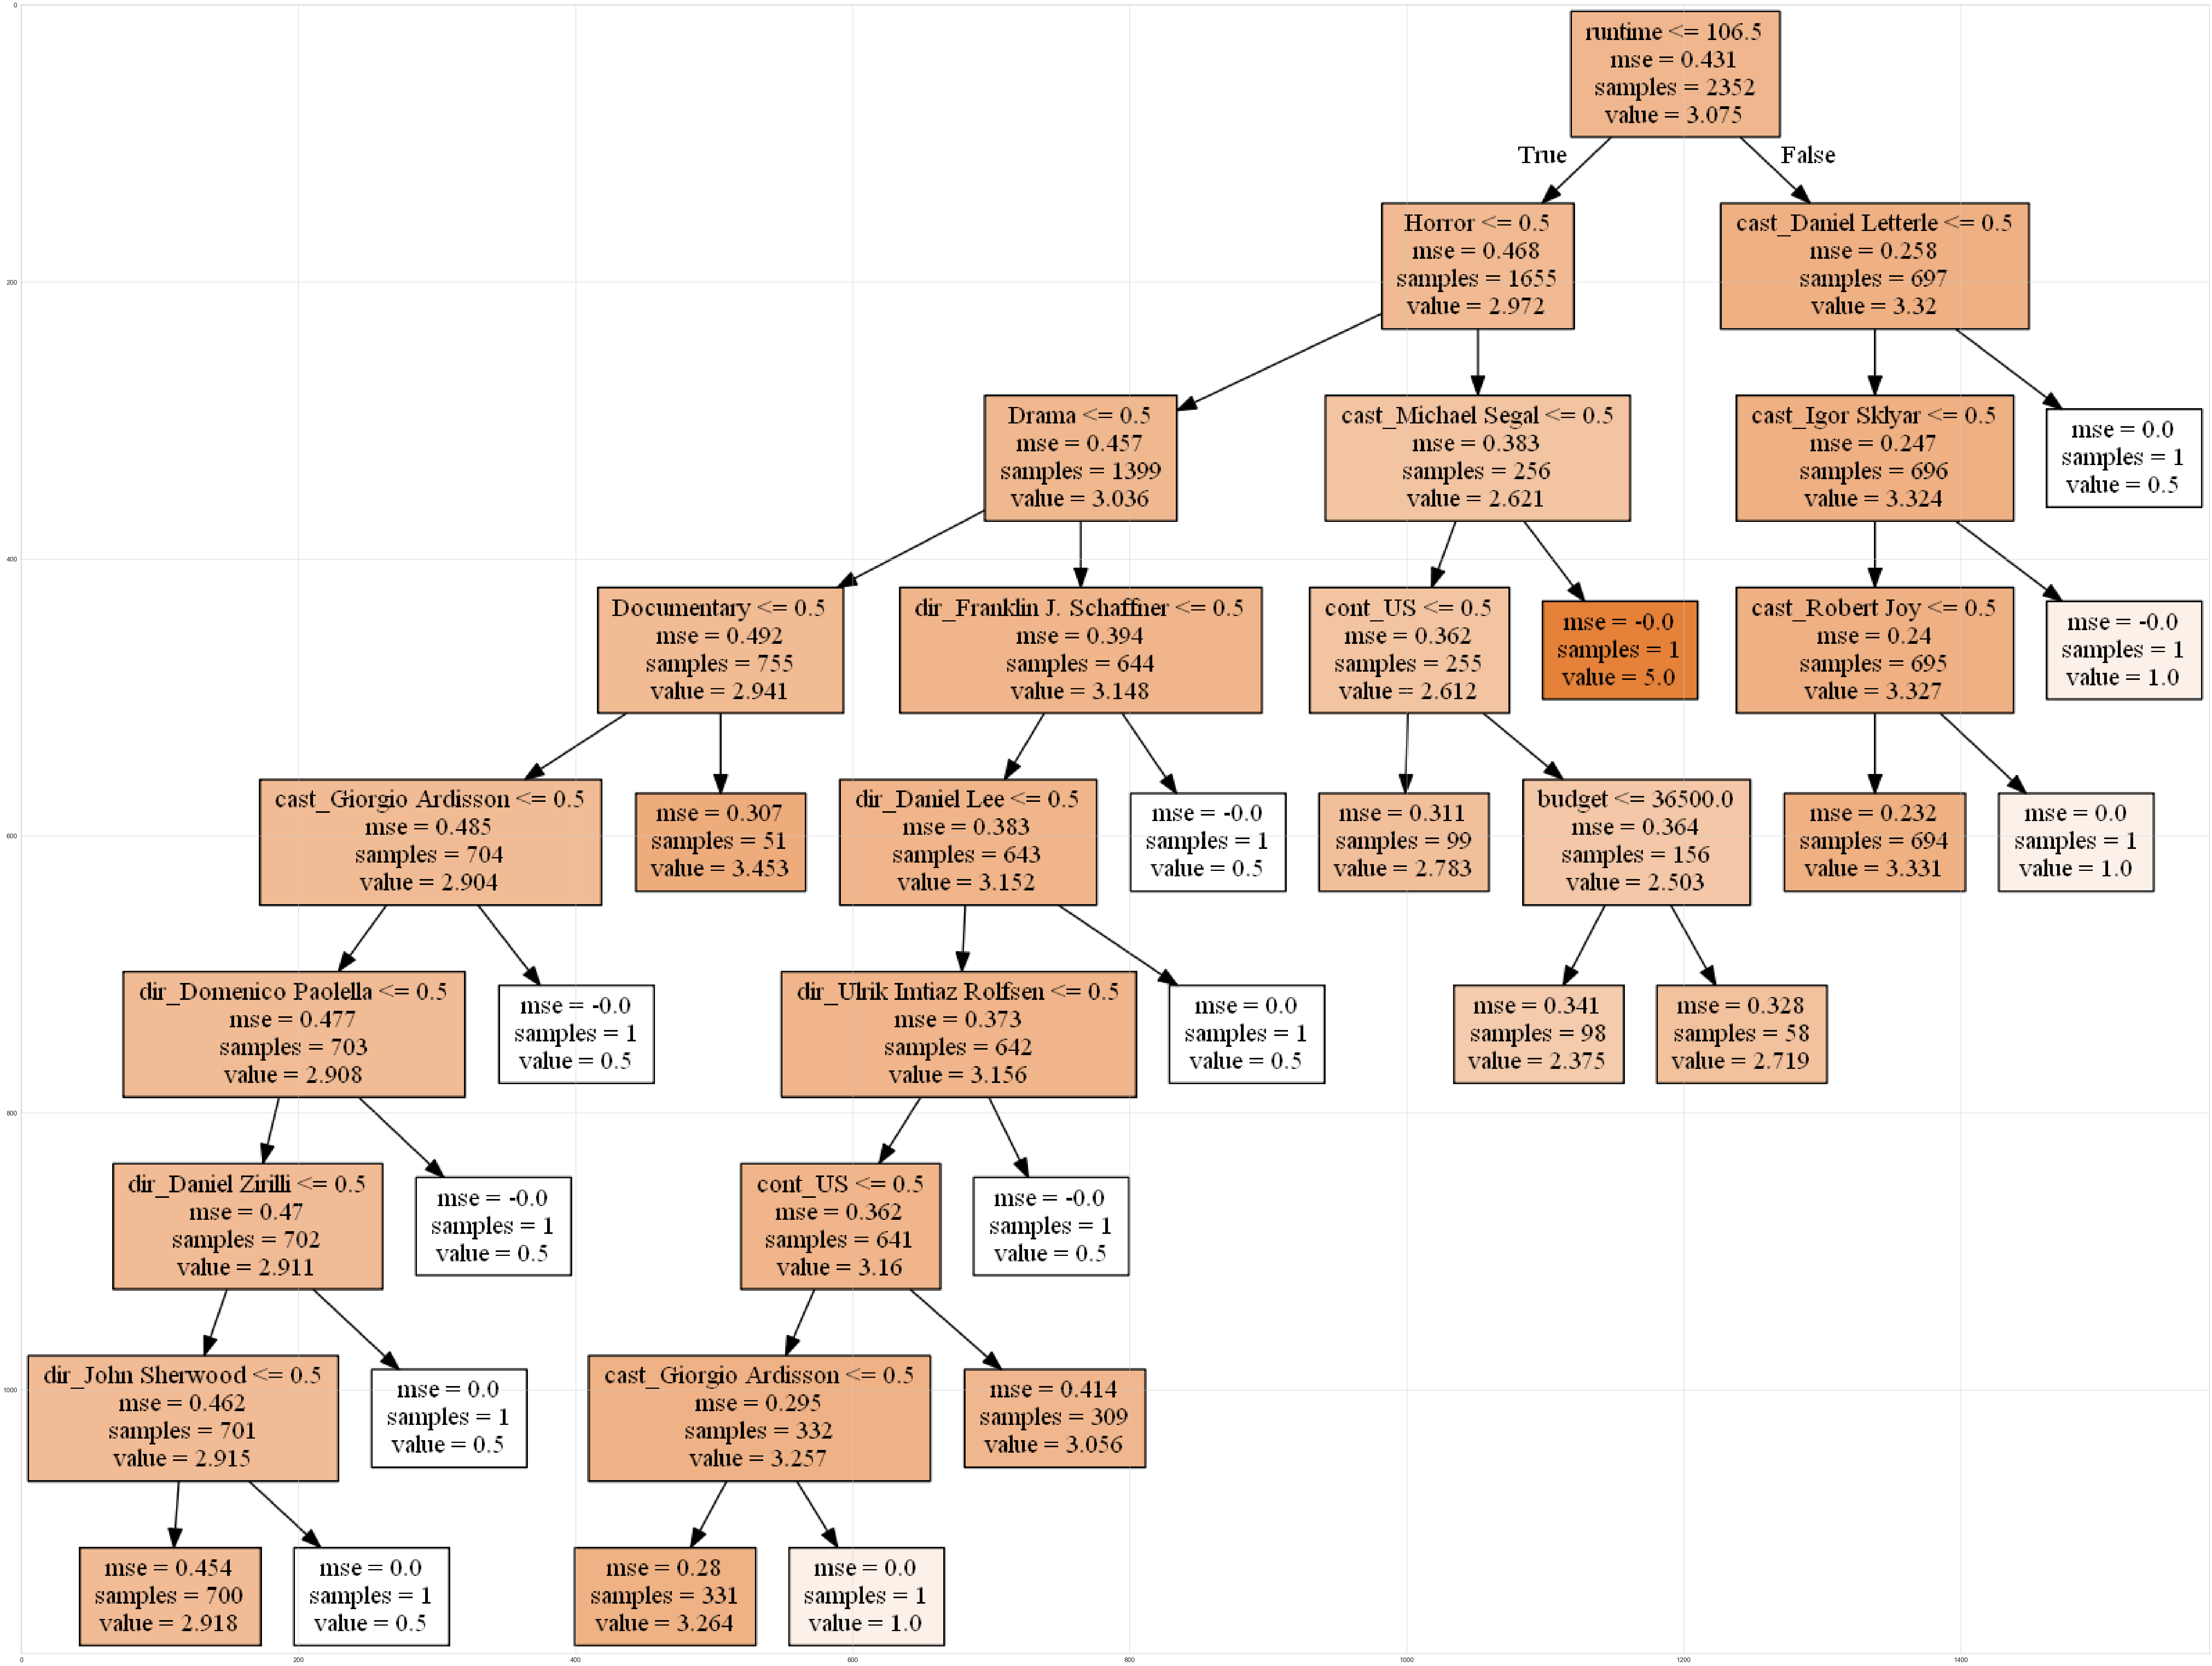

In [132]:
from IPython.display import Image  
from sklearn import tree
import matplotlib.image as mpimg
import pydotplus
import io
import matplotlib.pyplot as plt

import sys
str1 = "/usr/local/Cellar/graphviz/2.40.1_1/bin/"
sys.path.append(str1)

dot_data = io.StringIO()
tree.export_graphviz(rt, out_file=dot_data, filled=True, feature_names = names, class_names = 'Ratings')

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('dt.png')

plt.figure(figsize=(100, 100))
img = mpimg.imread('dt.png')
imgplot = plt.imshow(img)

plt.show()

In [133]:
plt.savefig()

SyntaxError: EOL while scanning string literal (<ipython-input-133-95cb3131a7b0>, line 1)

############################

# XGBoost Regression

# Tree looks a bit different but Evaluation Metrics seem pretty simiilar to CART, tiny bit better for the first xgb_model

############################

In [143]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [144]:
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [141]:
# divide data into labels and attributes
X = mlrc8.drop('rating', axis=1)
y = mlrc8['rating']

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# XGB model 1

In [147]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_model

[18:57:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [148]:
y_pred = xgb_model.predict(X_test)

In [149]:
compare =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
compare

,Actual,Predicted
18855,3.322917,3.286771
13901,3.250000,3.160308
3875,2.788462,3.235856
4175,3.273810,3.100677
34722,4.500000,2.861015
...,...,...
36087,3.875000,3.299867
2074,3.573658,3.244539
18554,3.576923,3.548332
31499,3.750000,3.308233


In [150]:
# Evaluating the XGBoost regression model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.442651477133924
Mean Squared Error: 0.3607262572624103
Root Mean Squared Error: 0.6006049094558005


In [151]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/
importance = xgb_model.feature_importances_

In [152]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00291
Feature: 1, Score: 0.00055
Feature: 2, Score: 0.00354
Feature: 3, Score: 0.00101
Feature: 4, Score: 0.00089
Feature: 5, Score: 0.01069
Feature: 6, Score: 0.00491
Feature: 7, Score: 0.00083
Feature: 8, Score: 0.00019
Feature: 9, Score: 0.00068
Feature: 10, Score: 0.00071
Feature: 11, Score: 0.02826
Feature: 12, Score: 0.00112
Feature: 13, Score: 0.00071
Feature: 14, Score: 0.00093
Feature: 15, Score: 0.00422
Feature: 16, Score: 0.00448
Feature: 17, Score: 0.00107
Feature: 18, Score: 0.00031
Feature: 19, Score: 0.00101
Feature: 20, Score: 0.00104
Feature: 21, Score: 0.00398
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

NameError: name 'pyplot' is not defined

In [419]:
conda install -c conda-forge pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\spark2\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.0                |   py37hf50a25e_1         3.1 MB  conda-forge
    graphviz-2.38.0            |    h6538335_1011        41.0 MB  conda-forge
    pydotplus-2.0.2            |             py_2          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        44.0 MB

The following NEW packages will be INSTALLED:

  graphviz           conda-forge/win-64::graphviz-2.38.0-h6538335_1011
  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_2

The following packages will be UPDATED:

  conda                                4.8.5-py37hc8dfbb8_1 --> 4.9.0-py37hf50a25e_1




g

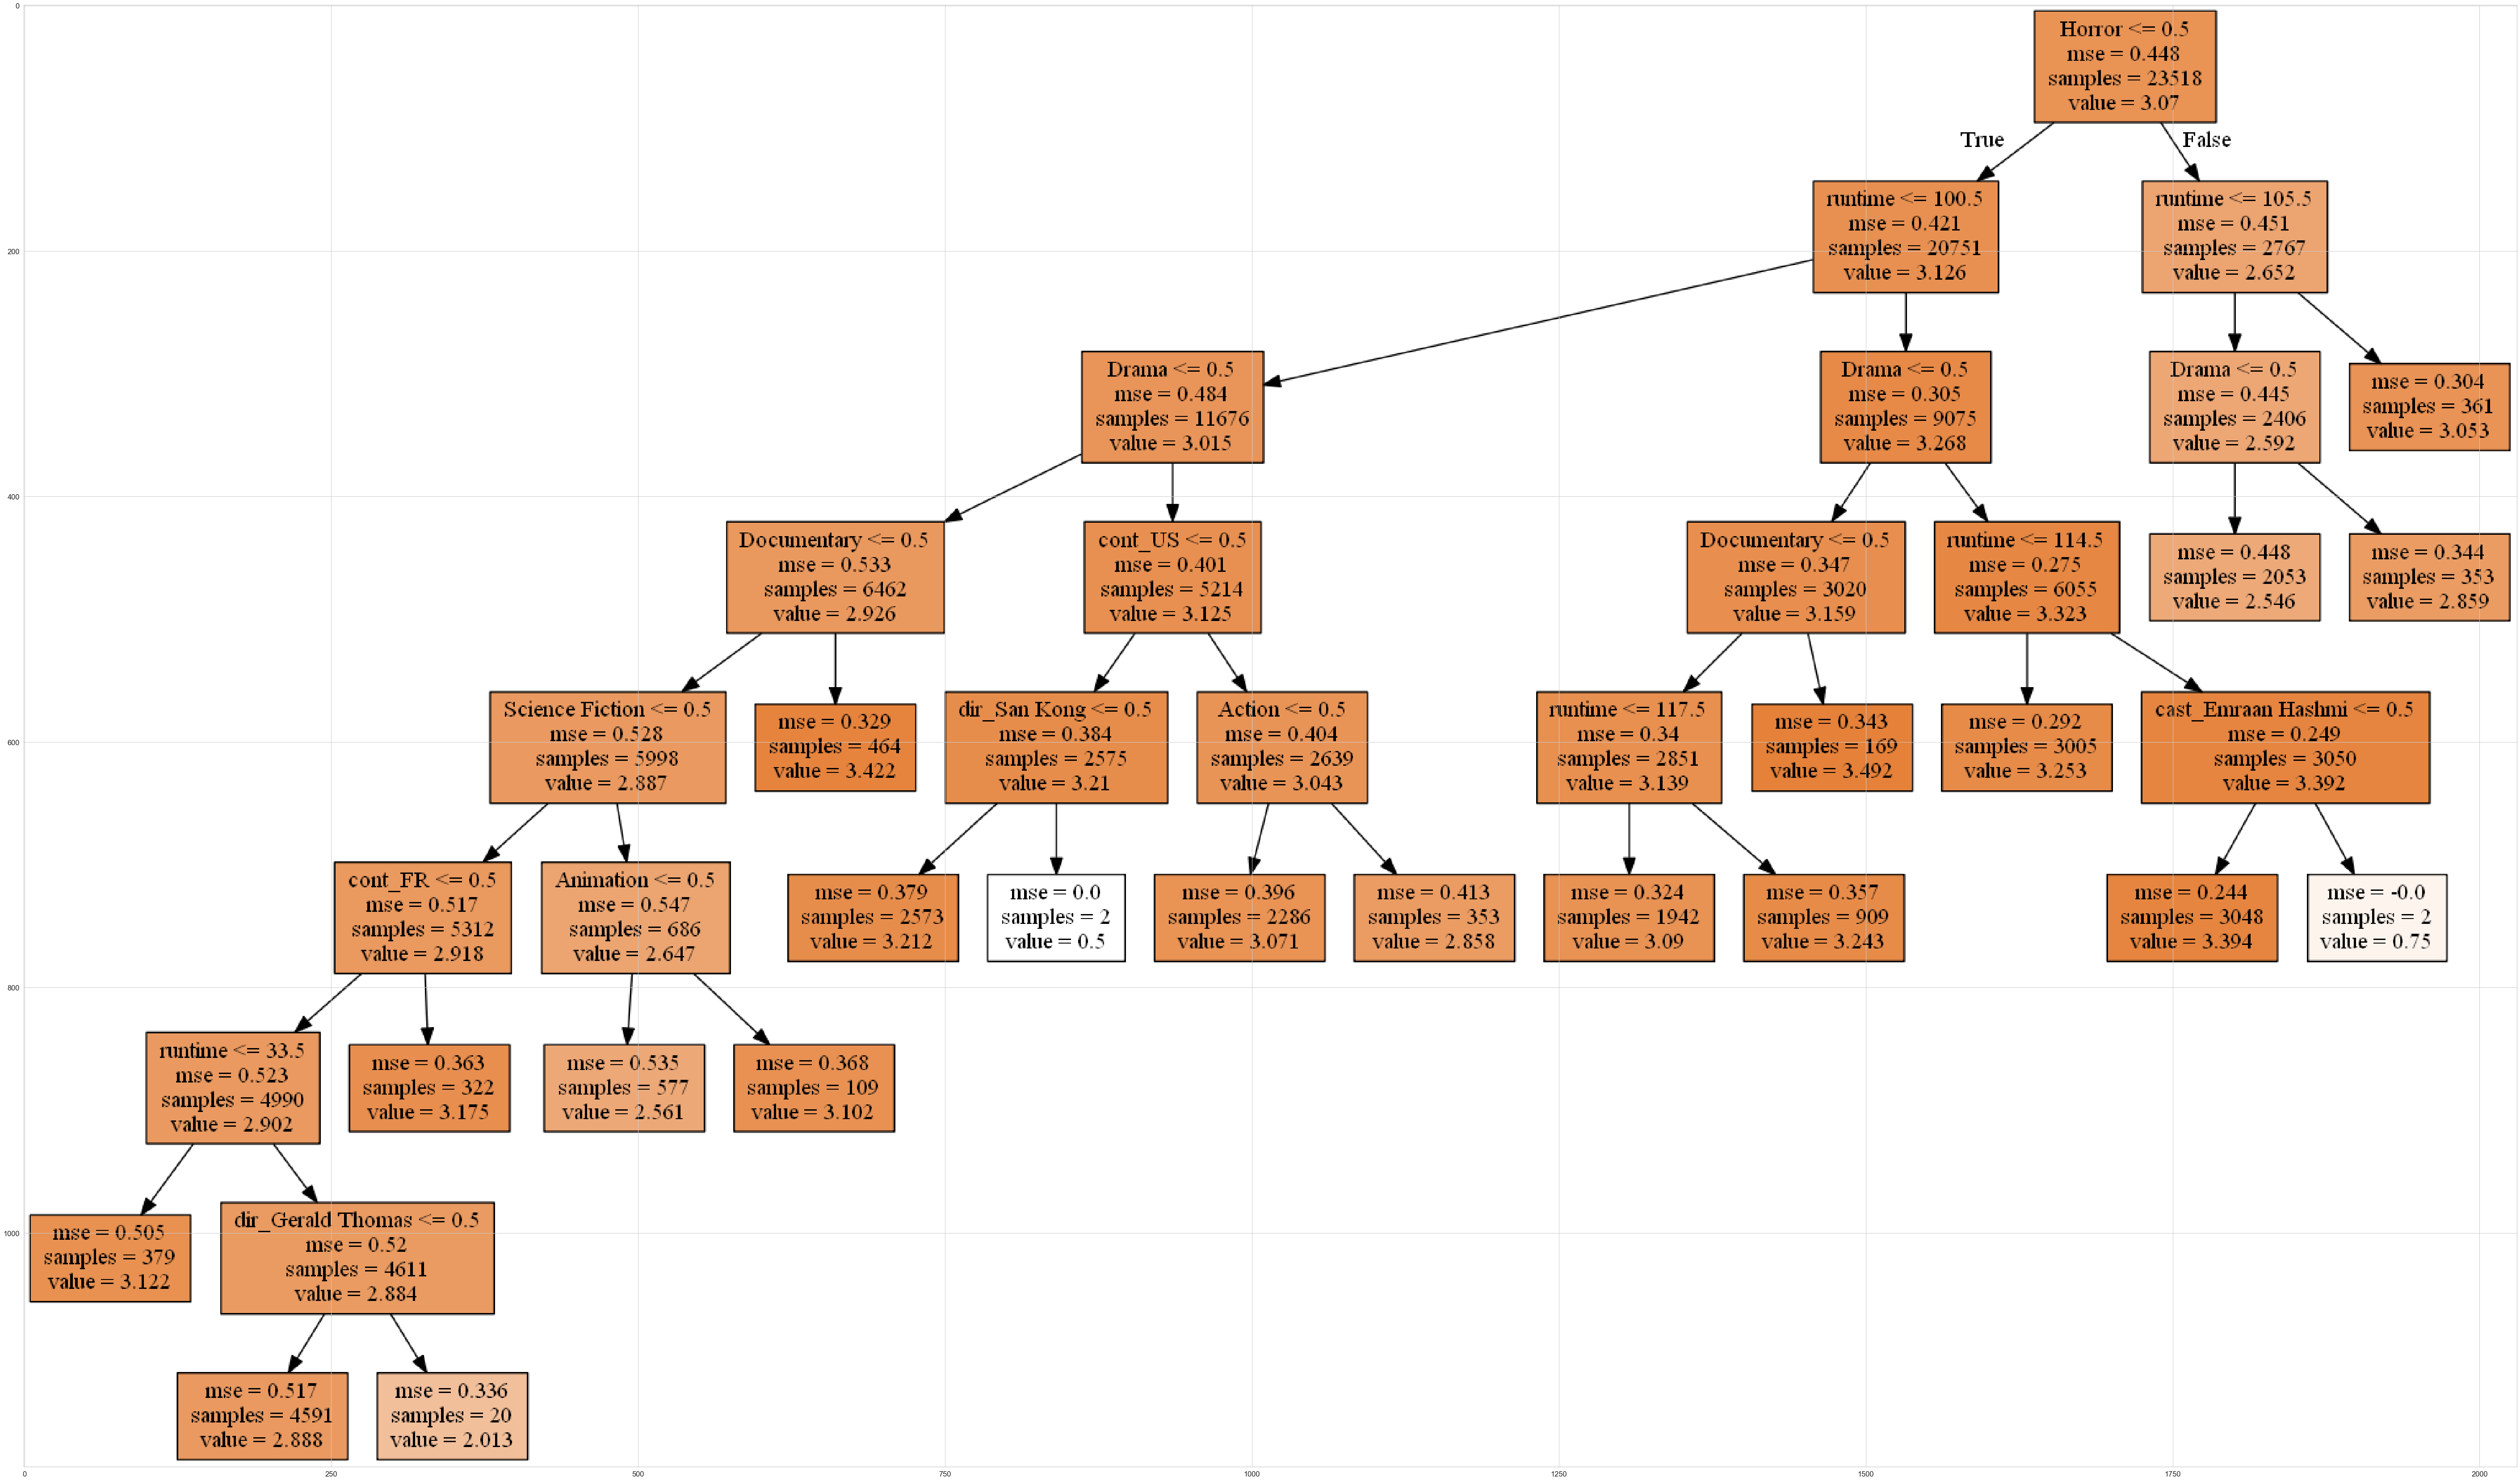

In [153]:
from IPython.display import Image  
from sklearn import tree
import matplotlib.image as mpimg
import pydotplus
import io
import matplotlib.pyplot as plt

import sys
str1 = "/usr/local/Cellar/graphviz/2.40.1_1/bin/"
sys.path.append(str1)

dot_data = io.StringIO()
tree.export_graphviz(rt, out_file=dot_data, filled=True, feature_names = names, class_names = 'Ratings')

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('dt.png')

plt.figure(figsize=(100, 100))
img = mpimg.imread('dt.png')
imgplot = plt.imshow(img)

plt.show()

In [133]:
plt.savefig()

SyntaxError: EOL while scanning string literal (<ipython-input-133-95cb3131a7b0>, line 1)

# XGB Model 2 --faster than XGB Model 1, worse performance

In [154]:
xgb_model2 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xgb_model2.fit(X_train, y_train)
xgb_model2

[19:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:19:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [155]:
y_pred = xgb_model2.predict(X_test)

In [156]:
compare =pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
compare

,Actual,Predicted
18855,3.322917,2.285888
13901,3.250000,2.210087
3875,2.788462,2.249390
4175,3.273810,2.200997
34722,4.500000,2.117204
...,...,...
36087,3.875000,2.217270
2074,3.573658,2.210087
18554,3.576923,2.285888
31499,3.750000,2.285888


In [157]:
# Evaluating the XGBoost regression model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9845448305882288
Mean Squared Error: 1.2181122791354477
Root Mean Squared Error: 1.1036812398221905


# CAN DISREGARD FROM HERE

# Trying CART --Classifier Tree-- not working out really

In [69]:
# divide data into labels and attributes --df2
X = mlrc3.drop('rating', axis=1)
y = mlrc3['rating']

In [70]:
X.head(1)

,movieId,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,original_language,prod1,country,budget,runtime,lead_actor,lead_actress,director1
0,1.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8,1362,57,30000000,81.0,2478,227,1370


In [71]:
names =list(X.columns)

# CART

# Classifier Tree

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [73]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_leaf_nodes =20, max_depth =8)
ct = classifier.fit(X_train, y_train)
ct

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [74]:
y_pred = classifier.predict(X_test)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0    0    0    0    0   20    0  154    0    4]
 [   0    0    0    0    0  146    0  502    0   10]
 [   0    0    0    0    0   52    0  283    0    2]
 [   0    0    0    0    0  241    0 1123    0   40]
 [   0    0    0    0    0   87    0  797    0   14]
 [   0    0    0    0    0  801    0 2881    0  124]
 [   0    0    0    0    0  163    0 1702    0   61]
 [   0    0    0    0    0  650    0 4473    0  270]
 [   0    0    0    0    0   68    0 1225    0  126]
 [   0    0    0    0    0  281    0 2196    0  282]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       178
           1       0.00      0.00      0.00       658
           2       0.00      0.00      0.00       337
           3       0.00      0.00      0.00      1404
           4       0.00      0.00      0.00       898
           5       0.32      0.21      0.25      3806
           6       0.00      0.00      0.00      1926
           7       0.29      0.83   

C:\Users\spark2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
importance = ct.feature_importances_

In [77]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.50224
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.01927
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01895
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.03889
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.02549
Feature: 23, Score: 0.02489
Feature: 24, Score: 0.20137
Feature: 25, Score: 0.16891
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000


NameError: name 'pyplot' is not defined